In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score,auc, roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import optuna

In [3]:
df1 = pd.read_csv(r'C:\Users\mihir\Documents\Python Scripts\InternStuff\train.csv')
df1.shape

(381109, 12)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df1['Region_Code'].value_counts()

Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
23.0      1960
31.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: count, dtype: int64

In [7]:
df1['Policy_Sales_Channel'].value_counts()

Policy_Sales_Channel
152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: count, Length: 155, dtype: int64

In [8]:
df1['Vintage_Months'] = (df1['Vintage']/30).round(2)

In [9]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vintage_Months
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,7.23
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,6.10
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0.90
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,6.77
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1.30


In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10)) 

sns.countplot(ax=axes[0,0],x='Gender',hue='Response',data=df1,palette="mako") 
sns.countplot(ax=axes[0,1],x='Driving_License',hue='Response',data=df1,palette="mako") 
sns.countplot(ax=axes[1,0],x='Previously_Insured',hue='Response',data=df1,palette="mako") 
sns.countplot(ax=axes[1,1],x='Vehicle_Age',hue='Response',data=df1,palette="mako")
sns.countplot(ax=axes[2,0],x='Vehicle_Damage',hue='Response',data=df1,palette="mako")

In [ ]:
categorical_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 
                    'Previously_Insured', 'Region_Code', 'Policy_Sales_Channel']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df1, x=col, order=df1[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
numerical_cols = ['Age', 'Annual_Premium', 'Vintage']
for col in numerical_cols:
    plt.figure(figsize=(12,5))

    plt.subplot(1, 2, 1)
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df1[col])
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


In [10]:
df1['Annual_Premium_log'] = np.log1p(df1['Annual_Premium'])

In [ ]:
sns.pairplot(df1.sample(1000), hue='Response')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df1[numerical_cols + ['Response']].corr(), annot=True, linewidths=0.5, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [11]:
df1= df1.drop(columns=['id', 'Vintage', 'Annual_Premium'])

In [12]:
df1 = pd.get_dummies(df1, columns=['Gender', 'Vehicle_Damage'],
    prefix={'Gender': 'Gender', 'Vehicle_Damage': 'Damage'},
    drop_first=True)

In [13]:
df1.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Policy_Sales_Channel,Response,Vintage_Months,Annual_Premium_log,Gender_Male,Damage_Yes
0,44,1,28.0,0,> 2 Years,26.0,1,7.23,10.607946,True,True
1,76,1,3.0,0,1-2 Year,26.0,0,6.10,10.420405,True,False
2,47,1,28.0,0,> 2 Years,26.0,1,0.90,10.553075,True,True
3,21,1,11.0,1,< 1 Year,152.0,0,6.77,10.261861,True,False
4,29,1,41.0,1,< 1 Year,152.0,0,1.30,10.221832,False,False


In [14]:
df1['Vehicle_Age'] = df1['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2})

In [15]:
df1.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Policy_Sales_Channel,Response,Vintage_Months,Annual_Premium_log,Gender_Male,Damage_Yes
0,44,1,28.0,0,2,26.0,1,7.23,10.607946,True,True
1,76,1,3.0,0,1,26.0,0,6.10,10.420405,True,False
2,47,1,28.0,0,2,26.0,1,0.90,10.553075,True,True
3,21,1,11.0,1,0,152.0,0,6.77,10.261861,True,False
4,29,1,41.0,1,0,152.0,0,1.30,10.221832,False,False


In [16]:
df1["Age"] = pd.cut(df1['Age'], bins=[0, 29, 35, 50, 100])
df1['Age']= df1['Age'].cat.codes

In [17]:
df1.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Policy_Sales_Channel,Response,Vintage_Months,Annual_Premium_log,Gender_Male,Damage_Yes
0,2,1,28.0,0,2,26.0,1,7.23,10.607946,True,True
1,3,1,3.0,0,1,26.0,0,6.10,10.420405,True,False
2,2,1,28.0,0,2,26.0,1,0.90,10.553075,True,True
3,0,1,11.0,1,0,152.0,0,6.77,10.261861,True,False
4,0,1,41.0,1,0,152.0,0,1.30,10.221832,False,False


In [18]:
region_target_mean = df1.groupby('Region_Code')['Response'].mean()
df1['Region_Code_encoded'] = df1['Region_Code'].map(region_target_mean)


In [19]:
df1= df1.drop(columns=['Region_Code'])
df1.head()

,Age,Driving_License,Previously_Insured,Vehicle_Age,Policy_Sales_Channel,Response,Vintage_Months,Annual_Premium_log,Gender_Male,Damage_Yes,Region_Code_encoded
0,2,1,0,2,26.0,1,7.23,10.607946,True,True,0.187163
1,3,1,0,1,26.0,0,6.10,10.420405,True,False,0.127662
2,2,1,0,2,26.0,1,0.90,10.553075,True,True,0.187163
3,0,1,1,0,152.0,0,6.77,10.261861,True,False,0.112760
4,0,1,1,0,152.0,0,1.30,10.221832,False,False,0.121776


In [20]:
y = df1['Response']
X = df1.drop(['Response'], axis = 1)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split( X, y ,test_size = 0.3, random_state = 101) 
X_train.shape, X_test.shape

((266776, 10), (114333, 10))

In [22]:
sm = SMOTE(random_state= 101)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

In [23]:
from collections import Counter
print("Before SMOTE:", Counter(Y_train))
print("After SMOTE:", Counter(Y_train_res))

Before SMOTE: Counter({0: 234013, 1: 32763})
After SMOTE: Counter({0: 234013, 1: 234013})


In [24]:
def performance_met(model, X_train_res, Y_train_res, X_test, Y_test):
    
    acc_train=accuracy_score(Y_train_res, model.predict(X_train_res))

    f1_train=f1_score(Y_train_res, model.predict(X_train_res))

    acc_test=accuracy_score(Y_test, model.predict(X_test))

    f1_test=f1_score(Y_test, model.predict(X_test))

    print("train score: accuracy:{} f1:{}".format(acc_train,f1_train))

    print("test score: accuracy:{} f1:{}".format(acc_test,f1_test))



In [25]:
def evaluate_model(model, X_test, Y_test, model_name="Model"):
    y_pred = model.predict(X_test)

    print(f"\n🧾 Classification Report for {model_name}:\n")
    print(classification_report(Y_test, y_pred))

    cm = confusion_matrix(Y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


[I 2025-06-12 15:58:46,476] A new study created in memory with name: no-name-d5cfcf2b-8d81-43d2-bf6c-486c8783d21f
C:\Users\mihir\AppData\Local\Temp\ipykernel_18368\3746976585.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.15),
C:\Users\mihir\AppData\Local\Temp\ipykernel_18368\3746976585.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\mihir\AppData\Local\Temp\ipykernel_18368\3746976585.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float 

Best hyperparameters: {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.058532365077449924, 'subsample': 0.8636007406212991, 'colsample_bytree': 0.5304690202730028, 'gamma': 0.05010252189028666, 'reg_alpha': 0.3658780399686106, 'reg_lambda': 0.023236088005765654}
Best F1 score: 0.4320315993441646
train score: accuracy:0.8289218975014209 f1:0.8457473554019924
test score: accuracy:0.7333753159630203 f1:0.4320315993441646

🧾 Classification Report for XGBoost with Optuna:

              precision    recall  f1-score   support

           0       0.97      0.72      0.83    100386
           1       0.29      0.83      0.43     13947

    accuracy                           0.73    114333
   macro avg       0.63      0.78      0.63    114333
weighted avg       0.89      0.73      0.78    114333



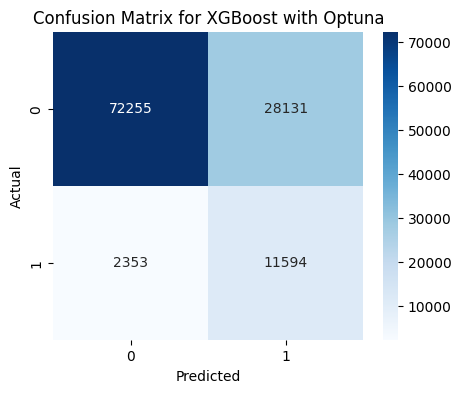

In [37]:

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400, step=100),
        'max_depth': trial.suggest_int('max_depth', 4, 14, step=2),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.15),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-3, 1e1),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1e2),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 1e2)
    }

    model = XGBClassifier(**param, random_state=101)
    model.fit(X_train_res, Y_train_res)
    
    y_pred = model.predict(X_test)
    
    f1 = f1_score(Y_test, y_pred)
    return f1

study = optuna.create_study(direction='maximize')  
study.optimize(objective, n_trials=200)  

print(f"Best hyperparameters: {study.best_params}")
print(f"Best F1 score: {study.best_value}")

best_xgb = XGBClassifier(**study.best_params, random_state=101)
best_xgb.fit(X_train_res, Y_train_res)

performance_met(best_xgb, X_train_res, Y_train_res, X_test, Y_test)
evaluate_model(best_xgb, X_test, Y_test, "XGBoost with Optuna")










XGBoost AUC: 0.8391


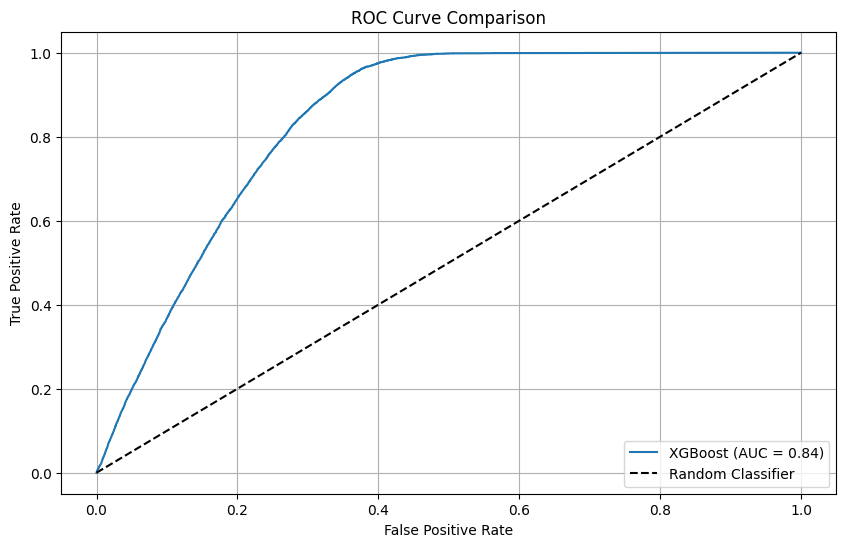

In [34]:
def compute_roc_auc(model, X_test, Y_test, model_name, scaled=False):
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:, 1]
    else:
        probs = model.decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test, probs)
    auc_score = auc(fpr, tpr)
    print(f"{model_name} AUC: {auc_score:.4f}")
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")
plt.figure(figsize=(10, 6))

compute_roc_auc(best_xgb, X_test, Y_test, "XGBoost")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()